### Importando Bibliotecas 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Carregando os Dados

In [3]:
df_cerveja = pd.read_csv('Consumo_cerveja.csv', sep = ';')
df_cerveja.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
df_cerveja.shape

(365, 7)

In [5]:
df_cerveja.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


### Coeficiente de Variação dos Dados

In [6]:
df_cerveja.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


### Comportamento do Consumo de Cerveja Durante o Ano

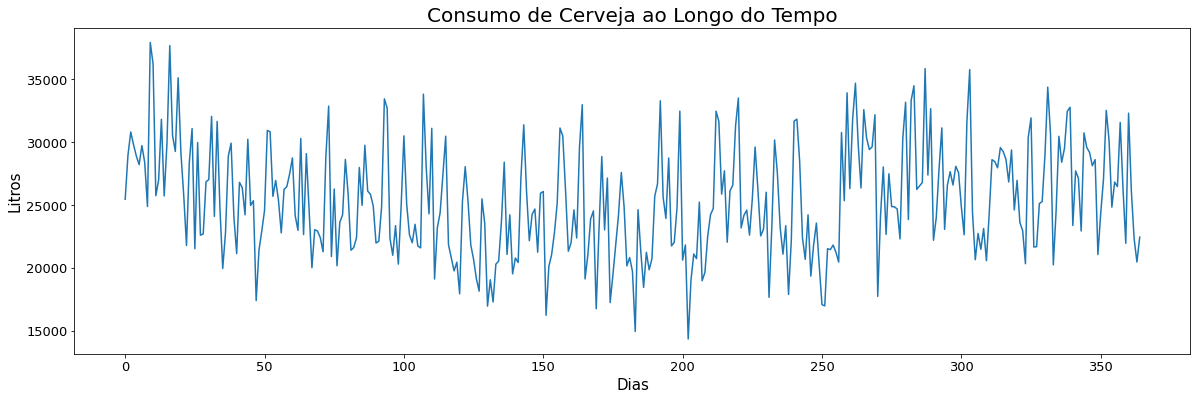

In [7]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja ao Longo do Tempo', fontsize = 20)
ax.set_ylabel('Litros',fontsize = 15)
ax.set_xlabel('Dias',fontsize = 15)
ax = df_cerveja['consumo'].plot(fontsize = 13)

In [8]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

[]

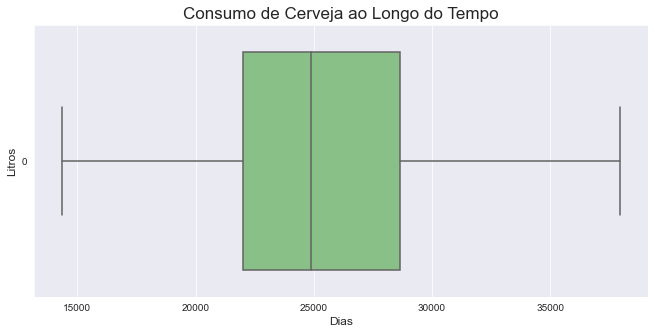

In [9]:
ax = sns.boxplot(data=df_cerveja['consumo'], orient = 'h',)
ax.figure.set_size_inches(11,5)
ax.set_title('Consumo de Cerveja ao Longo do Tempo', fontsize = 17)
ax.set_ylabel('Litros',fontsize = 12)
ax.set_xlabel('Dias',fontsize = 12)
plt.plot()

[]

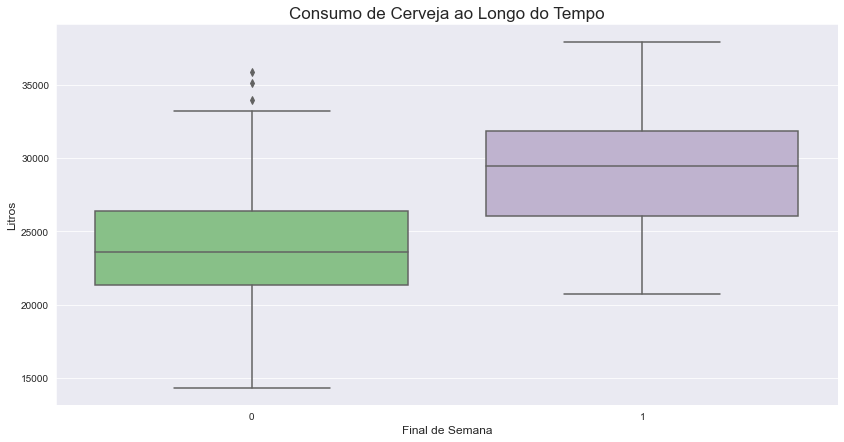

In [10]:
ax = sns.boxplot(x = 'fds', y = 'consumo', data=df_cerveja)
ax.figure.set_size_inches(14,7)
ax.set_title('Consumo de Cerveja ao Longo do Tempo', fontsize = 17)
ax.set_ylabel('Litros',fontsize = 12)
ax.set_xlabel('Final de Semana',fontsize = 12)
plt.plot()

### Distribuição de Frequência do Consumo de Cerveja 

[]

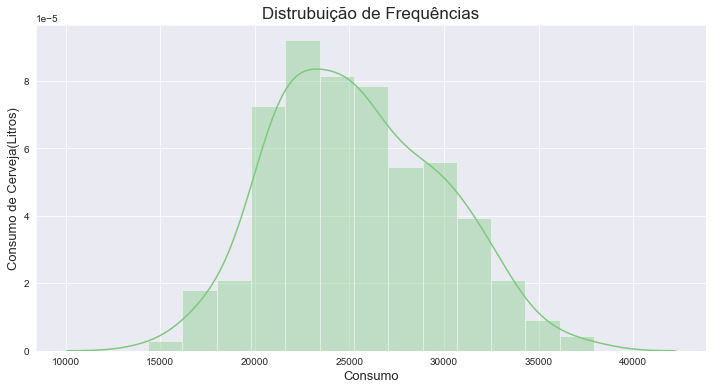

In [11]:
ax = sns.distplot(df_cerveja['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=17)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=13)
ax.set_xlabel('Consumo', fontsize=13)
plt.plot()

Text(0.5, 1.05, 'Dispersão entre as Variáveis')

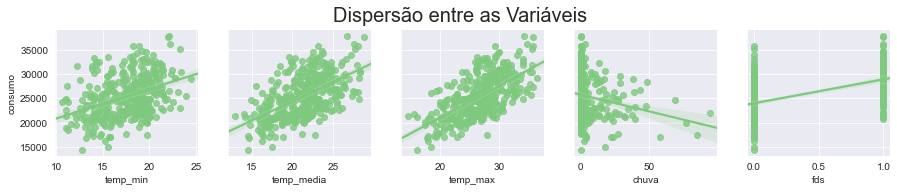

In [12]:
ax = sns.pairplot(df_cerveja, y_vars='consumo', 
                  x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'],kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)

### Testando e Treinando o Modelo de Regressão Linear

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df_cerveja['consumo']

In [15]:
X = df_cerveja[['temp_max', 'chuva', 'fds']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [39]:
modelo = LinearRegression()

In [40]:
modelo.fit(X_train,y_train)

LinearRegression()

In [41]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.74


In [42]:
y_previsto = modelo.predict(X_test)

In [43]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.66


In [44]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
79,25.3,14.7,1


In [45]:
modelo.predict(entrada)[0]

27532.804520109043

In [47]:
y_previsto_train = modelo.predict(X_train)

## Modelo de Regressão Linear

In [46]:
temp_max=36
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.0f} Litros de cerveja'.format(modelo.predict(entrada)[0]))

35928 Litros de cerveja


### Analisando a Precisão do Modelo

[]

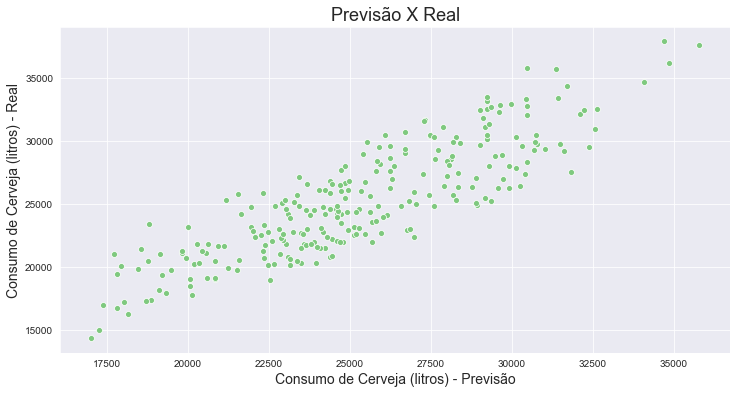

In [48]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
plt.plot()

In [49]:
X2 = df_cerveja[['temp_media', 'chuva', 'fds']]

In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [51]:
modelo_2 = LinearRegression()

In [52]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [53]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.74


In [54]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Máxima
R² = 0.66


In [55]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

### Analisando a Temperatura Média e Máxima

In [56]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2))) 

Modelo com Temp. Média
R² = 0.66


In [57]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2))) 

Modelo com Temp. Máxima
R² = 0.66


# CONCLUSÃO

Após uma análise minuciosa e criteriosa dos dados, observamos uma clara correlação entre o consumo de cerveja e outras variáveis presentes na tabela. Destacou-se uma significativa associação entre o consumo de cerveja, as condições climáticas e os dias da semana, com uma notável tendência de aumento nos finais de semana. Verificou-se que o consumo de cerveja é mais elevado em dias com temperaturas mais altas, enquanto apresenta uma redução em dias chuvosos ou de frio extremo.

A partir dessas observações, desenvolvemos um modelo eficaz de regressão linear, utilizando as variáveis de temperatura máxima, índice de chuva e indicador de final de semana para prever o consumo de cerveja em litros. Esse modelo proporciona uma análise preditiva valiosa, permitindo antecipar o comportamento do consumo de cerveja com base nas condições climáticas e na temporalidade, contribuindo assim para uma compreensão mais aprofundada desse padrão de consumo.